# Analysis on Indian Electricity Generation and Consumption 
---------------------------------------------------------------------------------------------------------------------------
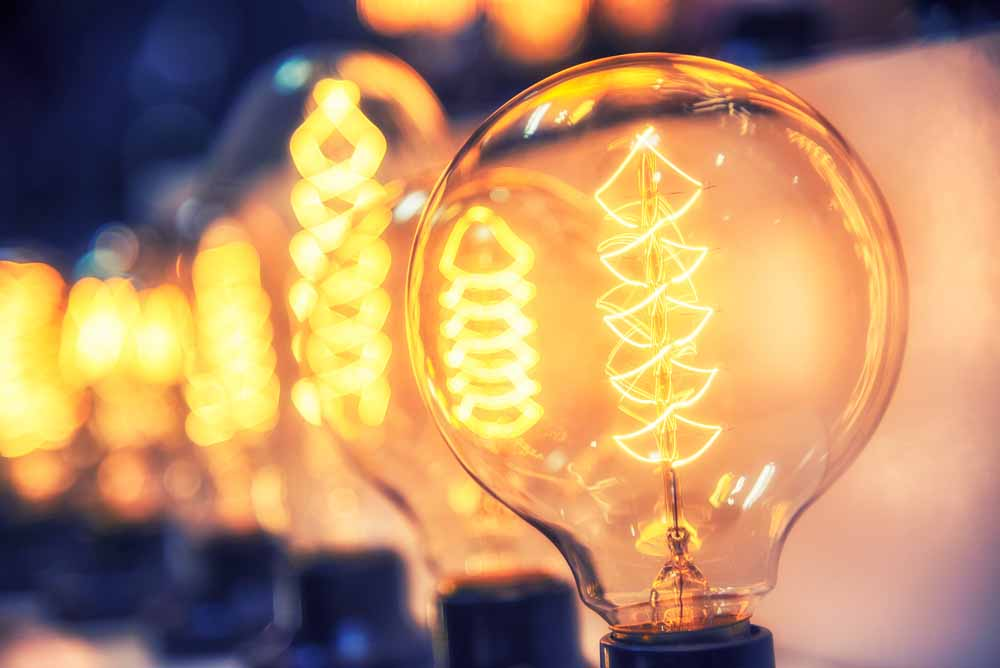

Analysis on Indian Electricity Generation and Consumption try to find out insights and the pattern of consumption and generation of electricity.<br>
This dataset is taken from Indian govt. site https://cea.nic.in/dashboard/?lang=en# There are lot of data present on the website but I take only three dataset for analysis. You can take more data for your analysis. The three dataset are as-<br>

1. **all-india-power-generati.csv** - (data avaliable from feb-2019 to jun-2022)
2. **renewable energy generation.csv** - (data avaliable from apr-2019 to feb-2020)
3. **per-capita-consumption-k.csv** - (data avaliable from 2002-2020)

Thus, the data is taken from the website so, our first agenda is cleaning the data and try to make dataset clean for the analysis.

**Note** - `All the power units in Mega Watt(MW)`


In [1]:
# importing basic library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Importing the Dataset-1 (all-india-power-generati.csv)
#### (feb-2019 to jun-2022)

#### 1.1 Importing Dataset-1

In [3]:
# importing dataset-1
data1 =pd.read_csv('all-india-power-generati.csv')

In [4]:
data1.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,NaN,NaN,107.53155
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,NaN,NaN,105.01283


#### 1.2 Data Cleaning

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month and Year          39 non-null     object 
 1   Thermal                 39 non-null     float64
 2   Nuclear                 39 non-null     float64
 3   Hydro                   39 non-null     float64
 4   BHUTAN IMP_Hydro        3 non-null      float64
 5   Renewable               3 non-null      float64
 6   Total Power Generation  39 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.3+ KB


In [6]:
# In 'month and year' column remove <br>All India 

for i in range (0,39):
    l=data1['Month and Year'][i]
    remove_last =l[:-13]
    data1['Month and Year'][i] = remove_last 


In [7]:
data1.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
0,Feb-2019,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261
1,Mar-2019,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345
2,Apr-2019,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904
3,Jul-2019,87.37192,4.38228,15.77735,NaN,NaN,107.53155
4,Aug-2019,80.78213,4.30232,19.92838,NaN,NaN,105.01283


In [8]:
# creating a duplicate column for month

data1['Month'] = data1['Month and Year']

In [9]:
# removing year from the 'month' column

for i in range (0,39):
    l=data1['Month'][i]
    remove_last =l[:-5]
    data1['Month'][i] = remove_last 

In [10]:
# repeat last 2 steps for creating 'year' column

data1['Year'] = data1['Month and Year']

for i in range (0,39):
    l=data1['Year'][i]
    remove_last =l[4:8]
    data1['Year'][i] = remove_last 

#### 1.3 Analysis

In [11]:
data1.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation,Month,Year
0,Feb-2019,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261,Feb,2019
1,Mar-2019,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345,Mar,2019
2,Apr-2019,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904,Apr,2019
3,Jul-2019,87.37192,4.38228,15.77735,NaN,NaN,107.53155,Jul,2019
4,Aug-2019,80.78213,4.30232,19.92838,NaN,NaN,105.01283,Aug,2019


In [12]:
data1.describe()

,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
count,39.000000,39.000000,39.000000,3.000000,3.000000,39.000000
mean,88.892082,3.781860,12.415727,0.144193,11.059817,105.951517
std,10.550878,0.413852,4.374672,0.100391,0.369958,9.833098
min,66.805720,2.704820,7.316260,0.068200,10.633820,80.787220
25%,82.622165,3.522955,8.435840,0.087290,10.939500,99.920930
50%,87.506630,3.860080,10.583860,0.106380,11.245180,105.338200
75%,93.113510,4.054310,15.892835,0.182190,11.272815,109.408925
max,111.582830,4.451320,20.790720,0.258000,11.300450,126.644980


<div class="alert alert-info">
    Insight<br>
        - There is no outliers present in 'Thermal', 'Nuclear',	'Hydro', 'Total Power Generation'<br>
        - Only 3 row data in column 'BHUTAN IMP_Hydro',	'Renewable'<br>
    </div>

In [13]:
data1.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation,Month,Year
0,Feb-2019,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261,Feb,2019
1,Mar-2019,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345,Mar,2019
2,Apr-2019,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904,Apr,2019
3,Jul-2019,87.37192,4.38228,15.77735,NaN,NaN,107.53155,Jul,2019
4,Aug-2019,80.78213,4.30232,19.92838,NaN,NaN,105.01283,Aug,2019


In [14]:
# grouping by 'year'
data1.groupby('Year').sum()

,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
Year,,,,,,
2019,731.03002,35.77350,117.72773,0.43258,33.17945,918.14328
2020,999.83336,44.61314,152.83573,0.00000,0.00000,1197.28223
2021,1112.32572,43.91795,149.76762,0.00000,0.00000,1306.01129
2022,623.60211,23.18795,63.88229,0.00000,0.00000,710.67235


<div class="alert alert-info">
    Insight<br>
        - In year 2019 power generation is lower because low demand of power due to covid-19 lockdown.<br>

#### Total Themral, Nuclear and Hydro power generation

In [15]:
data1[['Thermal','Nuclear','Hydro']].sum()

Thermal    3466.79121
Nuclear     147.49254
Hydro       484.21337
dtype: float64

In [16]:
print('Total Total Power Generation:',round(data1['Total Power Generation'].sum(),2))

Total Total Power Generation: 4132.11


#### Distribution % of power generation source

In [17]:
data1[['Thermal','Nuclear','Hydro']].sum()*100/data1['Total Power Generation'].sum()

Thermal    83.898829
Nuclear     3.569425
Hydro      11.718310
dtype: float64

<div class="alert alert-info">
    Insight<br>
        - About 84% of power generated from Thermal power generation.<br>

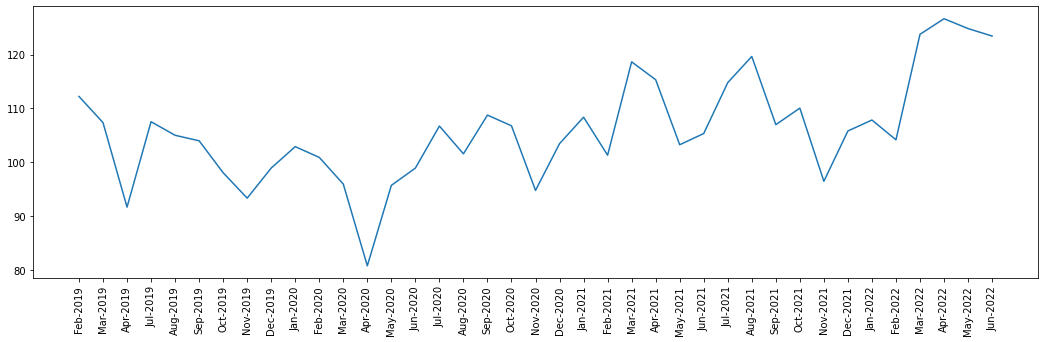

In [18]:
plt.figure(figsize=(18,5))
plt.plot(data1['Month and Year'],data1['Total Power Generation'])
plt.xticks(rotation=90);

<div class="alert alert-info">
    Insight<br>
        - In Apr-2020 power generation is lower because low demand of power due to covid-19 lockdown imposed in april for 3 weeks.<br>
        - The varation in generation of power is high due to the demand varies every month of the year.

# 2. Importing dataset-2 (renewable energy generation.csv)
#### (apr-2019 to feb-2020)

#### 2.1 Importing dataset-2

In [19]:
data2= pd.read_csv('renewable energy generation.csv')

#### 2.2 Cleaning data

In [20]:
data2.head()

,State Name,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total
0,Delhi<br>Feb-2020,0.00,7.09,0.00,0.00,0.00,19.63,26.72
1,Telangana<br>Feb-2020,20.25,570.24,13.83,20.34,2.57,4.04,631.27
2,Andhra Pradesh<br>Feb-2020,367.73,579.23,14.58,7.73,37.98,0.64,1007.89
3,Goa<br>Feb-2020,0.00,0.12,0.00,0.00,0.00,0.00,0.12
4,Daman & Diu<br>Feb-2020,0.00,2.11,0.00,0.00,0.00,0.00,2.11


In [21]:
data2.shape

(390, 8)

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State Name           390 non-null    object 
 1   Wind                 390 non-null    float64
 2   Solar                390 non-null    float64
 3   Biomass              390 non-null    float64
 4   Bagasse              390 non-null    float64
 5   Small Hydel          390 non-null    float64
 6   Others               389 non-null    float64
 7   RE Generation Total  390 non-null    float64
dtypes: float64(7), object(1)
memory usage: 24.5+ KB


In [23]:
data2['Month and Year'] = data2['State Name']

In [24]:
for i in range (0,390):
    l=data2['State Name'][i]
    remove_last =l[-8:]
    data2['Month and Year'][i] = remove_last 

In [25]:
for i in range (0,390):
    l=data2['State Name'][i]
    remove_last =l[:-12]
    data2['State Name'][i] = remove_last 

#### Analysis

In [26]:
data2.head()

,State Name,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total,Month and Year
0,Delhi,0.00,7.09,0.00,0.00,0.00,19.63,26.72,Feb-2020
1,Telangana,20.25,570.24,13.83,20.34,2.57,4.04,631.27,Feb-2020
2,Andhra Pradesh,367.73,579.23,14.58,7.73,37.98,0.64,1007.89,Feb-2020
3,Goa,0.00,0.12,0.00,0.00,0.00,0.00,0.12,Feb-2020
4,Daman & Diu,0.00,2.11,0.00,0.00,0.00,0.00,2.11,Feb-2020


In [27]:
data2.groupby('Month and Year').sum()

,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total
Month and Year,,,,,,,
Apr-2019,3707.29,4178.910,235.01,1201.29,518.15,38.77,9879.420
Aug-2019,9704.01,3585.990,234.16,251.26,1120.48,25.09,14920.990
Dec-2019,3950.78,3924.620,239.10,1857.18,701.69,29.61,10702.980
Feb-2020,3518.88,5085.175,312.20,1735.14,561.02,28.68,11241.095
Jan-2020,3319.96,4612.560,273.22,1906.93,562.16,23.96,10698.790
Jul-2019,11343.60,3438.590,275.22,258.75,831.38,29.03,16176.570
Jun-2019,8781.15,3929.380,202.28,313.76,665.55,38.23,13930.350
May-2019,6603.94,4342.250,229.03,632.78,592.36,29.37,12429.730
Nov-2019,2723.82,3936.160,207.67,867.72,830.52,27.57,8593.460


In [28]:
data2[['Wind','Solar','Biomass','Bagasse','Small Hydel','Others']].sum()

Wind           61243.210
Solar          44479.285
Biomass         2659.300
Bagasse         9508.710
Small Hydel     8783.890
Others           328.930
dtype: float64

<BarContainer object of 6 artists>

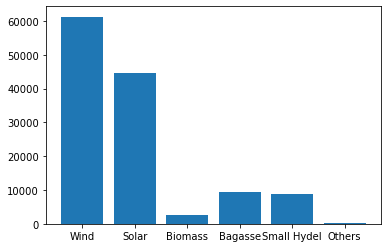

In [29]:
df3 = data2[['Wind','Solar','Biomass','Bagasse','Small Hydel','Others']].sum()
df3.reset_index()
plt.bar(df3.index,df3)

In [30]:
data2[['Wind','Solar','Biomass','Bagasse','Small Hydel','Others']].sum()*100/data2['RE Generation Total'].sum()

Wind           48.221738
Solar          35.022142
Biomass         2.093882
Bagasse         7.486977
Small Hydel     6.916268
Others          0.258993
dtype: float64

<div class="alert alert-info">
    Insight<br>
        - About 48% of RE comes from wind energy.<br>
        - About 35% of RE comes from Solar energy.<br>
        - Main source of RE are wind and solar energy.<br>

In [31]:
df_state = data2.groupby('State Name').sum()
df_state

,Wind,Solar,Biomass,Bagasse,Small Hydel,Others,RE Generation Total
State Name,,,,,,,
Andaman Nicobar,0.00,10.280,0.00,0.00,5.40,0.00,15.680
Andhra Pradesh,7219.07,5210.280,133.64,47.44,280.87,6.78,12898.080
Arunachal Pradesh,0.00,1.420,0.00,0.00,0.61,0.00,2.030
Assam,0.00,5.590,0.00,0.00,50.86,0.00,56.450
Bihar,0.00,141.050,17.29,137.88,12.89,0.00,309.110
Chhattisgarh,0.00,293.140,612.49,0.00,91.78,0.00,997.410
DVC,0.00,0.085,0.00,1.28,2.85,0.00,4.215
Dadra and Nagar Haveli,0.35,5.170,0.00,0.00,0.00,0.00,5.520
Daman & Diu,0.00,19.720,0.00,0.00,0.00,0.00,19.720


In [32]:
print('\n top 5 state generate wind power',df_state['Wind'].sort_values(ascending=False).head(5))
print('\n top 5 state generate solar power',df_state['Solar'].sort_values(ascending=False).head(5))
print('\n top 5 state generate Biomass power',df_state['Biomass'].sort_values(ascending=False).head(5))
print('\n top 5 state generate Bagasse power',df_state['Bagasse'].sort_values(ascending=False).head(5))
print('\n top 5 state generate Small Hydel power',df_state['Small Hydel'].sort_values(ascending=False).head(5))


 top 5 state generate wind power State Name
Tamil Nadu        13815.56
Gujarat           12682.15
Karnataka          9731.01
Maharashtra        7590.06
Andhra Pradesh     7219.07
Name: Wind, dtype: float64

 top 5 state generate solar power State Name
Karnataka         9874.19
Rajasthan         6883.22
Telangana         5613.98
Andhra Pradesh    5210.28
Tamil Nadu        4352.15
Name: Solar, dtype: float64

 top 5 state generate Biomass power State Name
Chhattisgarh    612.49
Maharashtra     377.60
Punjab          368.00
Rajasthan       355.12
Haryana         176.18
Name: Biomass, dtype: float64

 top 5 state generate Bagasse power State Name
Uttar Pradesh    3003.07
Maharashtra      2160.98
Karnataka        2035.73
West Bengal      1175.75
Tamil Nadu        332.51
Name: Bagasse, dtype: float64

 top 5 state generate Small Hydel power State Name
HP             1981.82
Karnataka      1839.20
Uttarakhand     692.74
Punjab          662.30
Maharashtra     619.34
Name: Small Hydel, dtype: 

<div class="alert alert-info">
    Insight<br>
        - Tamil Nadu is top generation of wind energy 13815.56 MW. <br>
        - Karnataka is top generation of solar energy 9874.19 MW.<br>
        - Chhattisgarh is top generation of biomass energy 612.49 MW.<br>
        - Uttar Pradesh is top generation of biogasse energy 3003.07 MW.<br>
        - Himachal Pradesh is top generation of Small Hydel energy 1981.82 MW.<br>

In [33]:
df_state['RE Generation Total'].sort_values(ascending=False).head(5)

State Name
Karnataka         23622.75
Tamil Nadu        18828.26
Gujarat           16209.35
Rajasthan         12955.36
Andhra Pradesh    12898.08
Name: RE Generation Total, dtype: float64

<div class="alert alert-info">
    Insight<br>
        - Karnataka is top generation of renewable energy 23622.75 MW. <br>

# 3. Importing dataset-3 (per-capita-consumption-k.csv) 
#### (data avaliable from 2002-2020)

#### 3.1 Importing data

In [34]:
data3 = pd.read_csv('per-capita-consumption-k.csv')

In [35]:
data3.head()

,Category,Per Capita Consumption
0,Meghalaya<br>2002-03,335.86
1,N R<br>2002-03,550.42
2,A.& N. Islands<br>2002-03,375.14
3,Punjab<br>2002-03,1227.39
4,Telangana<br>2002-03,NaN


#### 3.2 Data Cleaning

In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                756 non-null    object 
 1   Per Capita Consumption  744 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [37]:
data3['Year'] = data3['Category']

In [38]:
for i in range (0,756):
    l=data3['Category'][i]
    remove_last =l[-7:]
    data3['Year'][i] = remove_last

In [39]:
for i in range (0,756):
    l=data3['Category'][i]
    remove_last =l[:-11]
    data3['Category'][i] = remove_last

In [40]:
data3

,Category,Per Capita Consumption,Year
0,Meghalaya,335.860000,2002-03
1,N R,550.420000,2002-03
2,A.& N. Islands,375.140000,2002-03
3,Punjab,1227.390000,2002-03
4,Telangana,NaN,2002-03
...,...,...,...
751,Punjab,2171.191821,2019-20
752,Jammu & Kashmir,1383.635874,2019-20
753,E R,730.679645,2019-20
754,D. & N. Haveli,15517.228123,2019-20


In [41]:
data3.dropna(subset=['Per Capita Consumption'],inplace=True)

In [42]:
data3.shape

(744, 3)

In [43]:
data3['Category'].nunique()

42

In [44]:
data3['Category'].unique()

array(['Meghalaya', 'N R', 'A.& N. Islands', 'Punjab', 'Haryana',
       'Sikkim', 'W R', 'West Bengal', 'Karnataka', 'Bihar', 'Gujarat',
       'D. & N. Haveli', 'Chhattisgarh', 'Puducherry', 'Mizoram',
       'Andhra Pradesh', 'Manipur', 'Jammu & Kashmir', 'Himachal Pradesh',
       'Nagaland', 'Assam', 'Arunachal Pradesh', 'Tripura', 'S R',
       'Odisha', 'All India', 'Maharashtra', 'Uttar Pradesh',
       'Lakshadweep', 'N E R', 'Kerala', 'Jharkhand', 'Uttarakhand',
       'Delhi', 'E R', 'Rajasthan', 'Daman & Diu', 'Goa', 'Chandigarh',
       'Madhya Pradesh', 'Tamil Nadu', 'Telangana'], dtype=object)

In Category column  *'N R', 'W R', 'S R', 'All India', 'N E R', 'E R'* are Regions, not state.<br>
Remove region row from the data3

In [85]:
# droping region row from the data3
data3.drop(data3[(data3['Category'] == 'W R') | (data3['Category'] == 'N R') | (data3['Category'] == 'W R') | (data3['Category'] == 'S R') | (data3['Category'] == 'All India') | (data3['Category'] == 'N E R') | (data3['Category'] == 'E R') ].index,inplace=True)

#### 3.3 Analysis

In [49]:
data3

,Category,Per Capita Consumption,Year
0,Meghalaya,335.860000,2002-03
2,A.& N. Islands,375.140000,2002-03
3,Punjab,1227.390000,2002-03
5,Haryana,997.080000,2002-03
6,Sikkim,246.870000,2002-03
...,...,...,...
750,Jharkhand,853.487853,2019-20
751,Punjab,2171.191821,2019-20
752,Jammu & Kashmir,1383.635874,2019-20
754,D. & N. Haveli,15517.228123,2019-20


In [77]:
data3.groupby('Category').sum().sort_values('Per Capita Consumption', ascending=False).head()

,Per Capita Consumption
Category,
D. & N. Haveli,229326.355339
Daman & Diu,139817.125634
Goa,39205.855762
Puducherry,35155.657907
Gujarat,31498.245140


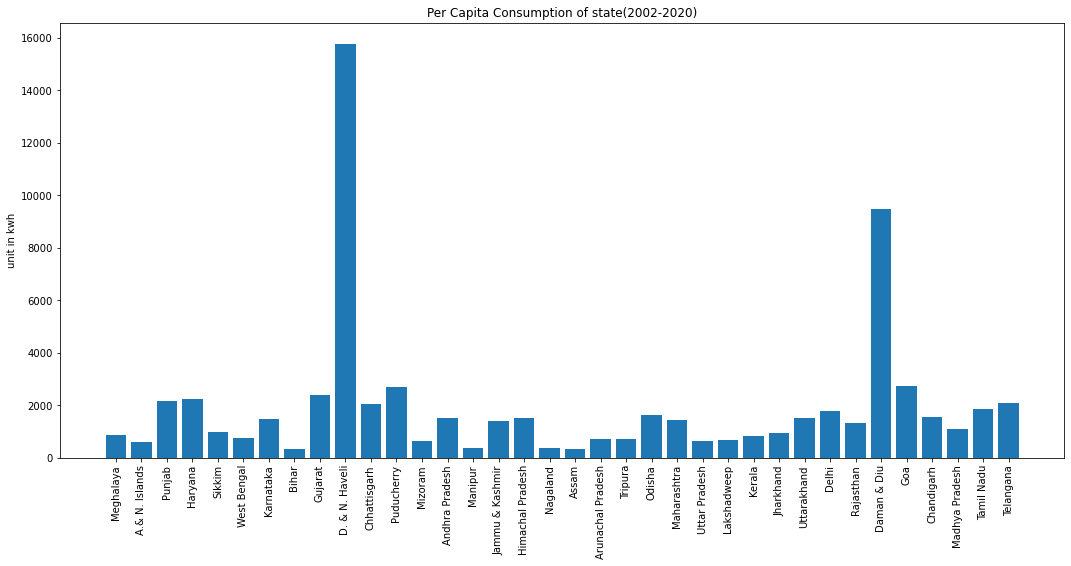

In [69]:
plt.figure(figsize=(18,8))
plt.bar(data3['Category'],data3['Per Capita Consumption'])
plt.xticks(rotation =90);
plt.ylabel('unit in kwh');
plt.title('Per Capita Consumption of state(2002-2020)');

#### *'D. & N. Haveli'* is highest consumption of energy per capita  and followed by *'Daman & Diu'*.
#### Check the both UTs per year consumption pattern

In [74]:
data3[data3['Category'] == 'D. & N. Haveli']

,Category,Per Capita Consumption,Year
12,D. & N. Haveli,4135.150000,2002-03
64,D. & N. Haveli,7496.780000,2003-04
108,D. & N. Haveli,8478.773182,2004-05
135,D. & N. Haveli,11567.670000,2005-06
191,D. & N. Haveli,13310.330000,2006-07
227,D. & N. Haveli,14787.380000,2007-08
274,D. & N. Haveli,11094.490000,2008-09
322,D. & N. Haveli,11863.636364,2009-10
356,D. & N. Haveli,13366.498561,2010-11
410,D. & N. Haveli,13766.559645,2011-12


In [79]:
data3[data3['Category'] == 'Daman & Diu']

,Category,Per Capita Consumption,Year
37,Daman & Diu,7375.940000,2002-03
83,Daman & Diu,7037.980000,2003-04
103,Daman & Diu,7545.682955,2004-05
138,Daman & Diu,8300.120000,2005-06
175,Daman & Diu,8950.430000,2006-07
217,Daman & Diu,9472.790000,2007-08
283,Daman & Diu,6507.960000,2008-09
324,Daman & Diu,7118.230769,2009-10
364,Daman & Diu,7810.218561,2010-11
412,Daman & Diu,7785.217345,2011-12


In [55]:
data3.groupby('Year').sum().sort_values('Per Capita Consumption', ascending=False).head()

,Per Capita Consumption
Year,
2019-20,64432.333596
2018-19,63333.903468
2016-17,62732.400387
2017-18,62493.446394
2015-16,60771.429940


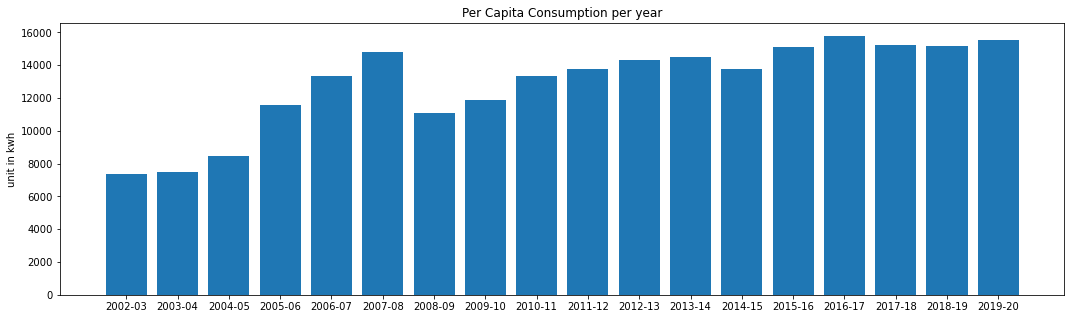

In [84]:
plt.figure(figsize=(18,5))
plt.bar(data3['Year'],data3['Per Capita Consumption'])
plt.ylabel('unit in kwh');
plt.title('Per Capita Consumption per year');

# 4. Conclusion
---------------------------------------------------------------------------------------------------------------------------

- In year 2019 power generation is lower because low demand of power due to covid-19 lockdown.
- Power generation is increasing and consumption increasing every year.
- About **84%** of power generated from **Thermal power** generation.(feb-2019 to jun-2022)
- About **83%** of renewable energy comes from **wind and solar** energy.(apr-2019 to feb-2020)
- **Karnataka** is top generation of renewable energy **23622.75 MW**.(apr-2019 to feb-2020)
    - **Tamil Nadu** is top generation of **wind energy 13815.56 MW**.
    - **Karnataka** is top generation of **solar energy 9874.19 MW**.
    - **Chhattisgarh** is top generation of **biomass energy 612.49 MW**.
    - **Uttar Pradesh** is top generation of **biogasse energy 3003.07 MW**.
    - **Himachal Pradesh** is top generation of **Small Hydel energy 1981.82 MW**.
- **'D. & N. Haveli'** is highest consumption of energy per capita and followed by **'Daman & Diu'**.